In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential ,Model
from tensorflow.keras.layers import Dense,Input
import numpy as np 
import matplotlib.pyplot as plt


In [4]:
from tensorflow.keras.datasets import mnist


In [73]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [74]:
(x_train.shape),(y_train.shape)

((60000, 28, 28), (60000,))

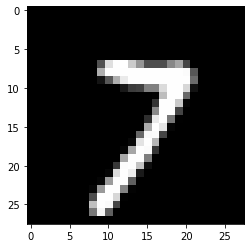

In [75]:
i=np.random.randint(0,59999)
plt.imshow(x_train[i],cmap='gray');

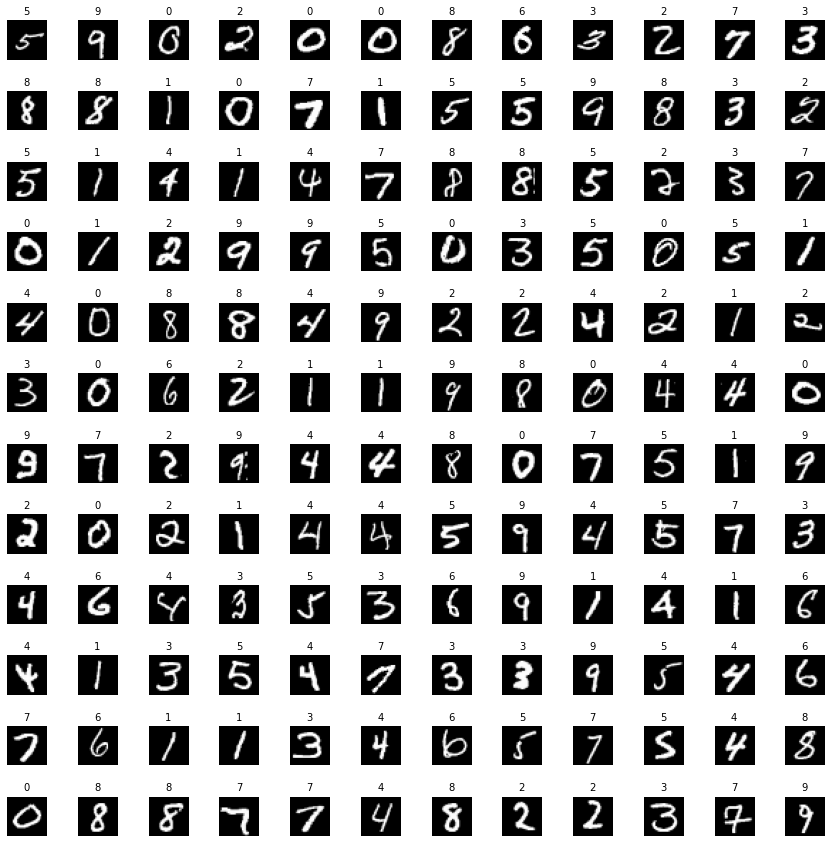

In [76]:
width=12
height=12
fig,axes=plt.subplots(width,height,figsize=(15,15))
axes=axes.ravel() #10*10 =100 converting matrix to vectors
for i in np.arange(0,width*height):
  index=np.random.randint(0,59999)
  axes[i].imshow(x_train[index],cmap='gray');
  axes[i].axis('off')
  axes[i].set_title(y_train[index],fontsize=10)
plt.subplots_adjust(hspace=0.8)  

In [77]:
#normalising the pixels value
x_train=x_train/255
x_test=x_test/255
(x_train.shape),(x_test.shape)

((60000, 28, 28), (10000, 28, 28))

In [78]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])


(x_train.shape),(x_test.shape)

((60000, 784), (10000, 784))

### ***Deep_linear_autoEncoder***

784-128-64-32...encoded....32-64-128-784...decoded

In [79]:
autoencoder=Sequential()

#encoder_level
autoencoder.add(Dense(units=128,activation='relu',input_dim=784))
autoencoder.add(Dense(units=64,activation='relu'))
autoencoder.add(Dense(units=32,activation='relu'))
#end of encoder level

# decoder_level
autoencoder.add(Dense(units=64,activation='relu'))
autoencoder.add(Dense(units=128,activation='relu'))
autoencoder.add(Dense(units=784,activation='sigmoid'))# since we have normalised our data between 0-1 and not relu coz it can even have -ve values and it doesnt make sense to use relu 

In [80]:
autoencoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_20 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_21 (Dense)             (None, 784)               101136    
Total params: 222,384
Trainable params: 222,384
Non-trainable params: 0
________________________________________________

In [81]:
autoencoder.compile(optimizer="Adam",loss='binary_crossentropy',metrics=['accuracy'])

In [82]:
autoencoder.fit(x_train,x_train,epochs=20)# sinc eautoencoder will have same input and output for comparision instead of y_train

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2085 - accuracy: 0.0090
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1150 - accuracy: 0.0110
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1048 - accuracy: 0.0110
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0989 - accuracy: 0.0134
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0958 - accuracy: 0.0127
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0939 - accuracy: 0.0131
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0925 - accuracy: 0.0134
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0915 - accuracy: 0.0127
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0906 - accuracy: 0.0135
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.089

In [84]:
encoder=Model(inputs=autoencoder.input,outputs=autoencoder.get_layer('dense_18').output)# dense_18 cause in my model i had dense 6 value to be 32 

In [85]:
encoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16_input (InputLayer)  [(None, 784)]             0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


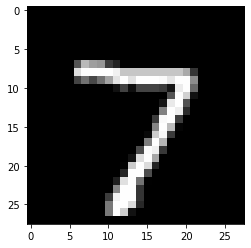

In [86]:
plt.imshow(x_test[0].reshape(28,28),cmap='gray')

In [87]:
x_test.reshape(1,-1)#since X_test shape is(784,) we need it in batch format hence we need one dimension added 
encoded_img=encoder.predict(x_test[0].reshape(1,-1))

In [88]:
encoded_img,encoded_img.shape #only 32 pixels are there now in our compressed image

(array([[ 6.0473886 ,  9.792658  ,  9.55994   ,  0.        ,  0.        ,
          7.3150682 ,  0.        ,  0.        ,  5.631747  ,  3.4017541 ,
          0.        ,  6.4891505 ,  0.        ,  0.        ,  4.6827726 ,
          0.        ,  5.3337817 ,  8.251014  , 12.343651  ,  9.188733  ,
          7.2451034 , 10.646711  ,  5.605915  ,  1.5764432 ,  6.833283  ,
          3.855762  ,  5.8153033 , 10.595371  ,  0.91729254,  7.841037  ,
         10.261016  ,  0.        ]], dtype=float32), (1, 32))

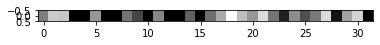

In [89]:
plt.imshow(encoded_img,cmap='gray')

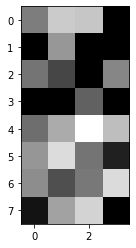

In [90]:
plt.imshow(encoded_img.reshape(8,4),cmap='gray')# this is the encoded image of 7

# we need to create a custom input layer since our dense 6 is just a dense layer and not input layer which we have to provide for our decoder as input

In [91]:
input_layer_decoder=Input(shape=(32,)) 
decoder_layer1=autoencoder.layers[3]#since instaed of using the layer name i.e dense7 we can use index to get the layer
decoder_layer2=autoencoder.layers[4]
decoder_layer3=autoencoder.layers[5]
decoder=Model(inputs=input_layer_decoder,outputs=decoder_layer3(decoder_layer2(decoder_layer1(input_layer_decoder))))

In [92]:
decoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_20 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_21 (Dense)             (None, 784)               101136    
Total params: 111,568
Trainable params: 111,568
Non-trainable params: 0
_________________________________________________________________


In [93]:
decoder_img=decoder.predict(encoded_img)

In [94]:
decoder_img.shape

(1, 784)

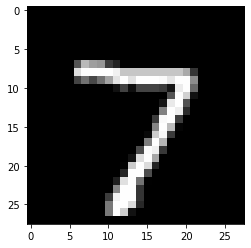

In [95]:
plt.imshow(x_test[0].reshape(28,28),cmap='gray')#original image

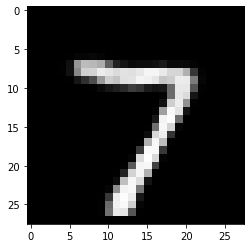

In [96]:
plt.imshow(decoder_img.reshape(28,28),cmap='gray')

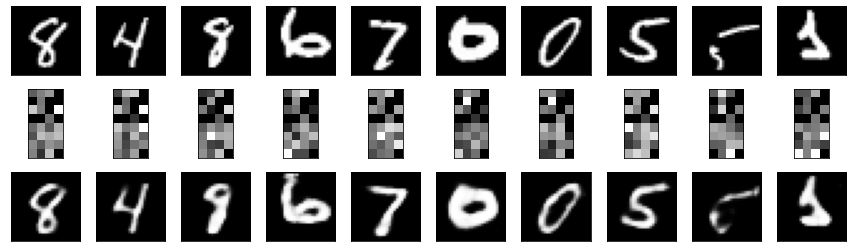

In [99]:
n_img=10
test_img=np.random.randint(0,x_test.shape[0] - 1,size=n_img)
plt.figure(figsize=(15,15))
for i,img_index in enumerate(test_img):
  a=plt.subplot(10,10,i+1)
  plt.imshow(x_test[img_index].reshape(28,28),cmap='gray')
  plt.xticks(())
  plt.yticks(())

  #encoded img
  a=plt.subplot(10,10,i + 1 + n_img)
  #x_test.reshape(1,-1)
  encoded_img=encoder.predict(x_test[img_index].reshape(1,-1))
  plt.imshow(encoded_img.reshape(8,4),cmap='gray')
  plt.xticks(())
  plt.yticks(())

  #decoded img
  a=plt.subplot(10,10,i+1+n_img*2)
  plt.imshow(decoder.predict(encoded_img).reshape(28,28),cmap='gray')
  plt.xticks(())
  plt.yticks(())#to remove the axis numbering

  
  

***convolutional Autoencoder***

In [101]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,UpSampling2D,Flatten,Reshape# opposite to maxpool we need to upsample
# since maxpool will reduce the shape and that flatter is used to transform a matrix to vector

In [102]:
from tensorflow.keras.datasets import fashion_mnist 

In [103]:
(X_train,Y_train),(X_test,Y_test)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [104]:
X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [105]:
Y_train.shape,Y_test.shape

((60000,), (10000,))

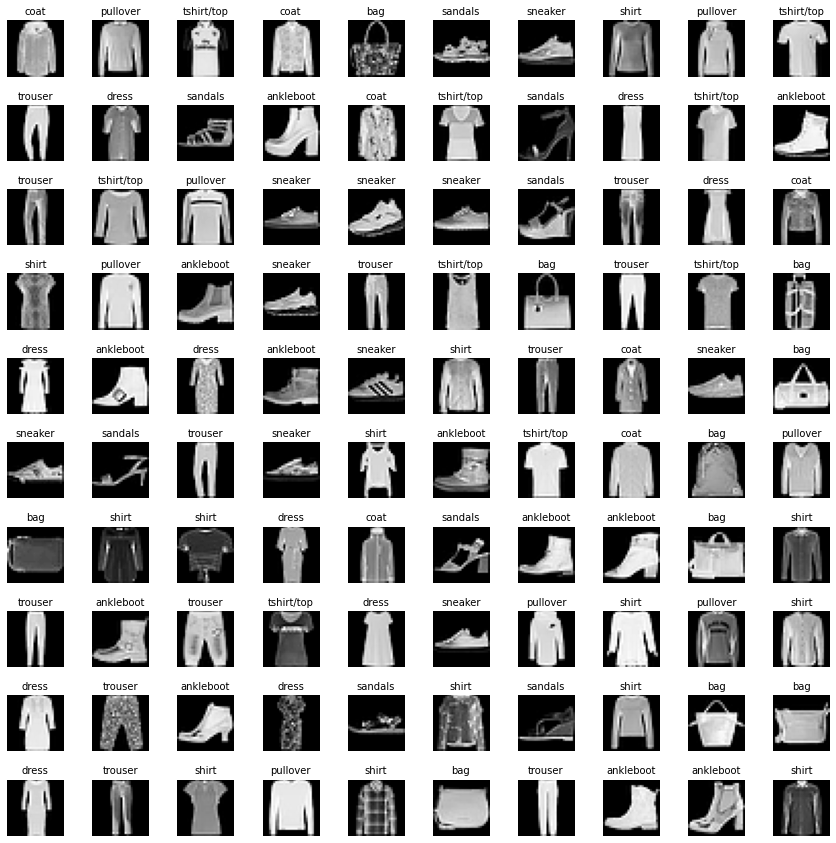

In [109]:
classes=['tshirt/top','trouser','pullover','dress','coat','sandals','shirt','sneaker','bag','ankleboot']
width=10
height=10
fig,axes=plt.subplots(width,height,figsize=(15,15))
axes=axes.ravel()
for i in np.arange(0,width*height):
  index=np.random.randint(0,60000)
  axes[i].imshow(X_train[index],cmap='gray')
  axes[i].set_title(classes[Y_train[index]],fontsize=10)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.5)


In [110]:
X_train=X_train/255
X_test=X_test/255

In [111]:
X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [112]:
X_train=X_train.reshape(len(X_train),28,28,1)
X_test=X_test.reshape(len(X_test),28,28,1)
X_train.shape,X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [137]:
autoencoder1=Sequential()

#encoder

autoencoder1.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',padding='same',input_shape=(28,28,1)))
autoencoder1.add(MaxPool2D(pool_size=(2,2)))

autoencoder1.add(Conv2D(filters=8,kernel_size=(3,3),activation='relu',padding='same'))

autoencoder1.add(MaxPool2D(pool_size=(2,2),padding='same'))

autoencoder1.add(Conv2D(filters=8,kernel_size=(3,3),activation='relu',padding='same',strides=(2,2)))

autoencoder1.add(Flatten())

#autoencoder1.summary()

#decoder repeate the same process in reverese order for decoder
autoencoder1.add(Reshape((4,4,8)))
autoencoder1.add(Conv2D(filters=8,kernel_size=(3,3),activation='relu',padding='same'))
# now we have to increase the size of the image
autoencoder1.add(UpSampling2D(size=(2,2)))#same size of maxpooling 

autoencoder1.add(Conv2D(filters=8,kernel_size=(3,3),activation='relu',padding='same'))
# now again we have to increase the size of the image
autoencoder1.add(UpSampling2D(size=(2,2)))#same size of maxpooling 

autoencoder1.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',padding='valid'))
autoencoder1.add(UpSampling2D(size=(2,2)))

autoencoder1.add(Conv2D(filters=1,kernel_size=(3,3),activation='sigmoid',padding='same'))#filter =1 coz we have our img in gray scale not colour to have 3 channels
autoencoder1.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)               0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 8)         

In [131]:
autoencoder1.compile(optimizer="Adam",loss="binary_crossentropy",metrics=['accuracy'])

In [133]:
autoencoder1.fit(X_train,X_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 81s 43ms/step - loss: 0.3510 - accuracy: 0.5015
Epoch 2/20
1875/1875 [==============================] - 80s 43ms/step - loss: 0.2890 - accuracy: 0.5055
Epoch 3/20
1875/1875 [==============================] - 80s 43ms/step - loss: 0.2842 - accuracy: 0.5066
Epoch 4/20
1875/1875 [==============================] - 80s 43ms/step - loss: 0.2808 - accuracy: 0.5069
Epoch 5/20
1875/1875 [==============================] - 81s 43ms/step - loss: 0.2794 - accuracy: 0.5073
Epoch 6/20
1875/1875 [==============================] - 81s 43ms/step - loss: 0.2780 - accuracy: 0.5071
Epoch 7/20
1875/1875 [==============================] - 81s 43ms/step - loss: 0.2767 - accuracy: 0.5075
Epoch 8/20
1875/1875 [==============================] - 81s 43ms/step - loss: 0.2753 - accuracy: 0.5084
Epoch 9/20
1875/1875 [==============================] - 81s 43ms/step - loss: 0.2744 - accuracy: 0.5086
Epoch 10/20
1875/1875 [==============================] - 80s 43m

In [143]:
encoder1=Model(inputs=autoencoder1.input, outputs = autoencoder1.get_layer('flatten_2').output)
encoder1.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12_input (InputLayer) [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)               0   

In [145]:
enc_img=encoder1.predict(X_test)

In [146]:
enc_img.shape

(10000, 128)

In [147]:
dec_img=autoencoder1.predict(X_test)
dec_img.shape

(10000, 28, 28, 1)

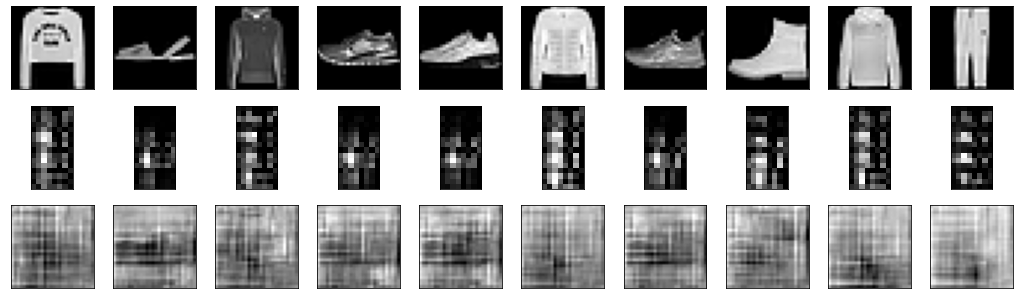

In [155]:
n_imgs=10
test_imgs=np.random.randint(0,X_test.shape[0],size=n_imgs)
plt.figure(figsize=(18,18))
for i , imag_indx in enumerate(test_imgs):
  ax=plt.subplot(10,10,i+1)
  plt.imshow(X_test[imag_indx].reshape(28,28),cmap='gray')
  plt.xticks(())
  plt.yticks(())



  #encoded
  ax=plt.subplot(10,10,i+1+n_imgs)
  plt.imshow(enc_img[imag_indx].reshape(16,8),cmap='gray')
  plt.xticks(())
  plt.yticks(())

  #decoded

  ax=plt.subplot(10,10,i+1+n_imgs*2)
  plt.imshow(dec_img[imag_indx].reshape(28,28),cmap='gray')
  plt.xticks(())
  plt.yticks(())


In [ ]:
# increase trainig to get better results